In [0]:
import pandas as pd
import numpy as np
from scipy import stats

In [0]:
defence = pd.read_excel("Defenders.xlsx")
defence.head()

,Name,Position,Team,clearances_blocks_interceptions,key_passes,recoveries,tackles,matches_played,minutes,team_points,xA,who_scored_ratings,completed_passes,clean_sheets,big_chances_created,open_play_crosses,goals_scored,dribbles,attempted_passes,assists
0,Trent Alexander-Arnold,Defender,Liverpool,99,48,171,26,29,64.736842,97,6.3,7.36,1314,16,10,34,1,14,1697,13
1,Virgil Van Dijk,Defender,Liverpool,258,7,194,23,38,89.052632,97,1.1,7.44,2725,20,3,0,4,9,3045,2
2,Dejan Lovren,Defender,Liverpool,70,1,45,7,13,25.947368,97,0.3,7.08,712,6,0,2,1,0,821,1
3,Joe Gomez,Defender,Liverpool,60,7,70,6,16,27.868421,97,0.4,6.76,688,7,0,2,0,4,785,0
4,Andrew Robertson,Defender,Liverpool,82,49,223,26,36,84.631579,97,6.6,7.12,1995,21,14,20,0,29,2400,12


In [0]:
#avg cbi
avg_cbi = defence["clearances_blocks_interceptions"] / defence["matches_played"]

#avg_keypasses
avg_kp = defence["key_passes"] / defence["matches_played"]

#avg_recovery
avg_recovery = defence["recoveries"] / defence["matches_played"]

#avg tackles
avg_tackles = defence["tackles"] / defence["matches_played"]

# completed passes 
completed_passes = defence["completed_passes"] / defence["matches_played"]

# Clean sheets
clean_sheet = defence["clean_sheets"] / defence["matches_played"]

# Big Chance Created
b_c_c = defence["big_chances_created"] / defence["matches_played"]

# open play crosses
opc = defence["open_play_crosses"] / defence["matches_played"]

# goals scored 
goals_scored = defence["goals_scored"] / defence["matches_played"]

# dribbles 
dribbles = defence["dribbles"] / defence["matches_played"]

# attempted_passes
attempted_passes = defence["attempted_passes"] / defence["matches_played"]

# assists
assists = defence["assists"] / defence["matches_played"]



In [0]:
#addign weights
#defender_rating = (avg_cbi*0.375 + avg_recovery*0.187 +  avg_kp*0.093 + avg_tackles*0.093 + xA*0.252) * 100
#defender_rating = (avg_cbi*0.2 + avg_recovery*0.2 +  avg_kp*0.2 + avg_tackles*0.2 + xA*0.2) * 100
defender_rating = (avg_cbi * 0.083 + avg_kp * 0.083 + avg_recovery * 0.083 + avg_tackles * 0.083+
                completed_passes * 0.083 +  clean_sheet*0.083 + b_c_c *0.083 +  opc*0.083 + 
               goals_scored*0.083 + dribbles*0.083+ attempted_passes*0.083 + assists*0.083 ) * 100

In [0]:
defence["ratings"] = defender_rating
defence

,Name,Position,Team,clearances_blocks_interceptions,key_passes,recoveries,tackles,matches_played,minutes,team_points,xA,who_scored_ratings,completed_passes,clean_sheets,big_chances_created,open_play_crosses,goals_scored,dribbles,attempted_passes,assists,ratings
0,Trent Alexander-Arnold,Defender,Liverpool,99,48,171,26,29,64.736842,97,6.3,7.36,1314,16,10,34,1,14,1697,13,985.410345
1,Virgil Van Dijk,Defender,Liverpool,258,7,194,23,38,89.052632,97,1.1,7.44,2725,20,3,0,4,9,3045,2,1373.868421
2,Dejan Lovren,Defender,Liverpool,70,1,45,7,13,25.947368,97,0.3,7.08,712,6,0,2,1,0,821,1,1063.676923
3,Joe Gomez,Defender,Liverpool,60,7,70,6,16,27.868421,97,0.4,6.76,688,7,0,2,0,4,785,0,845.043750
4,Andrew Robertson,Defender,Liverpool,82,49,223,26,36,84.631579,97,6.6,7.12,1995,21,14,20,0,29,2400,12,1123.036111
5,Joel Matip,Defender,Liverpool,110,3,94,19,22,40.394737,97,0.1,7.11,1165,9,1,0,1,5,1345,0,1038.254545
6,Kyle Walker,Defender,Manchester City,93,24,169,14,33,73.052632,98,1.7,6.96,2155,18,1,4,1,20,2393,1,1230.663636
7,Vincent Kompany,Defender,Manchester City,77,1,69,9,17,32.105263,98,0.1,6.93,1141,6,0,0,1,4,1227,0,1237.676471
8,John Stones,Defender,Manchester City,83,5,114,10,24,46.342105,98,0.2,6.87,1647,9,0,1,0,6,1750,0,1253.645833
9,Aymeric Laporte,Defender,Manchester City,144,13,183,13,35,80.421053,98,1.2,7.05,2771,18,1,1,3,3,3000,3,1459.140000


In [0]:
defence = defence.iloc[:, [0,1,2,11,20]]
defence.sort_values(by="ratings", ascending=False)
#defence

,Name,Position,Team,who_scored_ratings,ratings
9,Aymeric Laporte,Defender,Manchester City,7.05,1459.140000
11,Oleksandr Zinchenko,Defender,Manchester City,7.19,1432.342857
1,Virgil Van Dijk,Defender,Liverpool,7.44,1373.868421
22,Antonio Rudiger,Defender,Chelsea,6.78,1317.687879
8,John Stones,Defender,Manchester City,6.87,1253.645833
27,David Luiz,Defender,Chelsea,7.08,1247.075000
7,Vincent Kompany,Defender,Manchester City,6.93,1237.676471
6,Kyle Walker,Defender,Manchester City,6.96,1230.663636
31,Toby Alderweireld,Defender,Tottenham,6.84,1193.247059
32,Jan Vertonghen,Defender,Tottenham,6.89,1192.936364


In [0]:
d_data = defence.iloc[:, [4]]

In [0]:
scaled = (d_data - np.min(d_data)) / (np.max(d_data) - np.min(d_data))*10
#scaled = stats.zscore(d_data)

In [0]:
defence["scaled_rating"] = scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#defence.sort_values(by="ratings", ascending=False)
defence

,Name,Position,Team,who_scored_ratings,ratings,scaled_rating
0,Trent Alexander-Arnold,Defender,Liverpool,7.36,985.410345,5.873040
1,Virgil Van Dijk,Defender,Liverpool,7.44,1373.868421,9.257145
2,Dejan Lovren,Defender,Liverpool,7.08,1063.676923,6.554870
3,Joe Gomez,Defender,Liverpool,6.76,845.043750,4.650217
4,Andrew Robertson,Defender,Liverpool,7.12,1123.036111,7.071985
5,Joel Matip,Defender,Liverpool,7.11,1038.254545,6.333399
6,Kyle Walker,Defender,Manchester City,6.96,1230.663636,8.009597
7,Vincent Kompany,Defender,Manchester City,6.93,1237.676471,8.070690
8,John Stones,Defender,Manchester City,6.87,1253.645833,8.209810
9,Aymeric Laporte,Defender,Manchester City,7.05,1459.140000,10.000000


In [0]:
who = defence.iloc[:, [3]]
who_scored_scaled = (who - np.min(who)) / (np.max(who) - np.min(who))*10

In [0]:
defence["who_scored_scaled_rating"] = who_scored_scaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
defence.sort_values(by="ratings", ascending=False)

,Name,Position,Team,who_scored_ratings,ratings,scaled_rating,who_scored_scaled_rating
9,Aymeric Laporte,Defender,Manchester City,7.05,1459.140000,10.000000,6.666667
11,Oleksandr Zinchenko,Defender,Manchester City,7.19,1432.342857,9.766553,7.863248
1,Virgil Van Dijk,Defender,Liverpool,7.44,1373.868421,9.257145,10.000000
22,Antonio Rudiger,Defender,Chelsea,6.78,1317.687879,8.767721,4.358974
8,John Stones,Defender,Manchester City,6.87,1253.645833,8.209810,5.128205
27,David Luiz,Defender,Chelsea,7.08,1247.075000,8.152567,6.923077
7,Vincent Kompany,Defender,Manchester City,6.93,1237.676471,8.070690,5.641026
6,Kyle Walker,Defender,Manchester City,6.96,1230.663636,8.009597,5.897436
31,Toby Alderweireld,Defender,Tottenham,6.84,1193.247059,7.683637,4.871795
32,Jan Vertonghen,Defender,Tottenham,6.89,1192.936364,7.680931,5.299145


In [0]:

diff = defence['scaled_rating'] - defence['who_scored_scaled_rating']
defence["difference_of_ratings"] = diff
defence.iloc[:, [0,1,5,6,7]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Position,scaled_rating,who_scored_scaled_rating,difference_of_ratings
0,Trent Alexander-Arnold,Defender,5.873040,9.316239,-3.443200
1,Virgil Van Dijk,Defender,9.257145,10.000000,-0.742855
2,Dejan Lovren,Defender,6.554870,6.923077,-0.368207
3,Joe Gomez,Defender,4.650217,4.188034,0.462183
4,Andrew Robertson,Defender,7.071985,7.264957,-0.192972
5,Joel Matip,Defender,6.333399,7.179487,-0.846088
6,Kyle Walker,Defender,8.009597,5.897436,2.112161
7,Vincent Kompany,Defender,8.070690,5.641026,2.429665
8,John Stones,Defender,8.209810,5.128205,3.081604
9,Aymeric Laporte,Defender,10.000000,6.666667,3.333333


In [0]:
diff.sum()

15.187278302322419

In [0]:
x = defence["scaled_rating"]
y = defence["who_scored_scaled_rating"]

In [0]:
np.corrcoef(x, y)

array([[1.       , 0.6813907],
       [0.6813907, 1.       ]])

Text(10, -4, 'Correlation: 0.68')

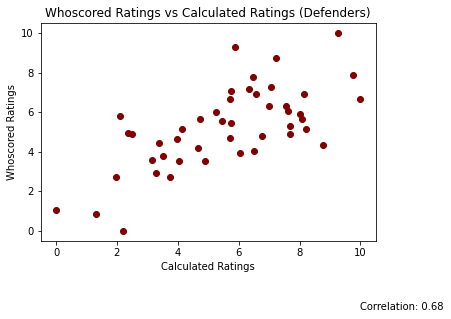

In [0]:
import matplotlib.pyplot as plt
plt1 = plt.scatter(x, y, color = "maroon")
plt.title("Whoscored Ratings vs Calculated Ratings (Defenders)")
plt.xlabel("Calculated Ratings")
plt.ylabel("Whoscored Ratings")
plt.text(10, -4,  "Correlation: 0.68")

2.118208587911798


0.5243714116452447
